In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn import preprocessing 
import matplotlib.pyplot as plt
import numpy as np
import os

In [6]:
cwd = os.getcwd()
dataset = pd.DataFrame(pd.read_csv(os.path.join(cwd, 'datasets/train_data.csv')))

In [7]:
dataset.columns

Index(['ID', 'parents', 'has_nurs', 'form', 'children', 'housing', 'finance',
       'social', 'health', 'app_status'],
      dtype='object')

In [8]:
dataset.shape

(10368, 10)

#### Any null fields?

In [9]:
print(dataset.isnull().any())

ID            False
parents       False
has_nurs      False
form          False
children      False
housing       False
finance       False
social        False
health        False
app_status    False
dtype: bool


In [10]:
del dataset['ID']
dataset.head()

,parents,has_nurs,form,children,housing,finance,social,health,app_status
0,usual,less_proper,complete,3,critical,convenient,problematic,not_recom,0
1,pretentious,very_crit,completed,1,convenient,inconv,nonprob,not_recom,0
2,pretentious,proper,incomplete,1,less_conv,convenient,slightly_prob,priority,1
3,great_pret,improper,complete,1,convenient,convenient,nonprob,recommended,1
4,great_pret,less_proper,completed,1,convenient,convenient,slightly_prob,priority,1


### class based instance distribution

In [11]:
print(dataset['app_status'].value_counts())

0    6694
1    3674
Name: app_status, dtype: int64


#### Sphereman Correlation

Spearman rank correlation is a non-parametric test that is used to measure the degree of association between two variables

In [12]:
from scipy.stats import spearmanr

In [13]:
columns = dataset.columns

spears = [spearmanr(dataset[column], dataset['app_status']) for column in columns]
for i, j in enumerate(spears):
    print('{}\t: {}'.format(columns[i], j[0]))

parents	: 0.2539225830053072
has_nurs	: 0.006180906776528462
form	: -0.04100926576518219
children	: -0.07711198625310553
housing	: -0.06633116847686987
finance	: -0.05277474909131158
social	: 0.004622485876953343
health	: 0.5447294840534749
app_status	: 0.9999999999999998


#### Visualizing each feature data related to class

Tells how each feature related and distributed to clases

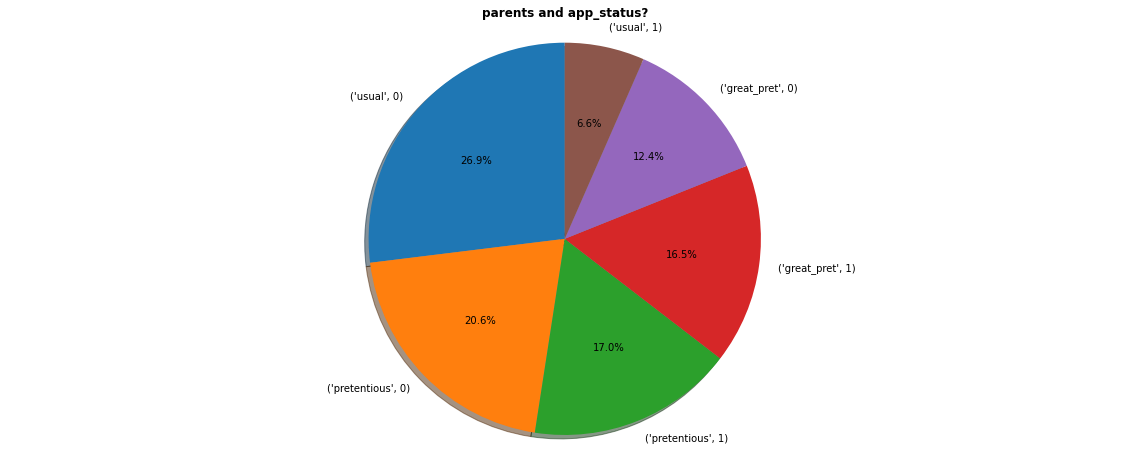

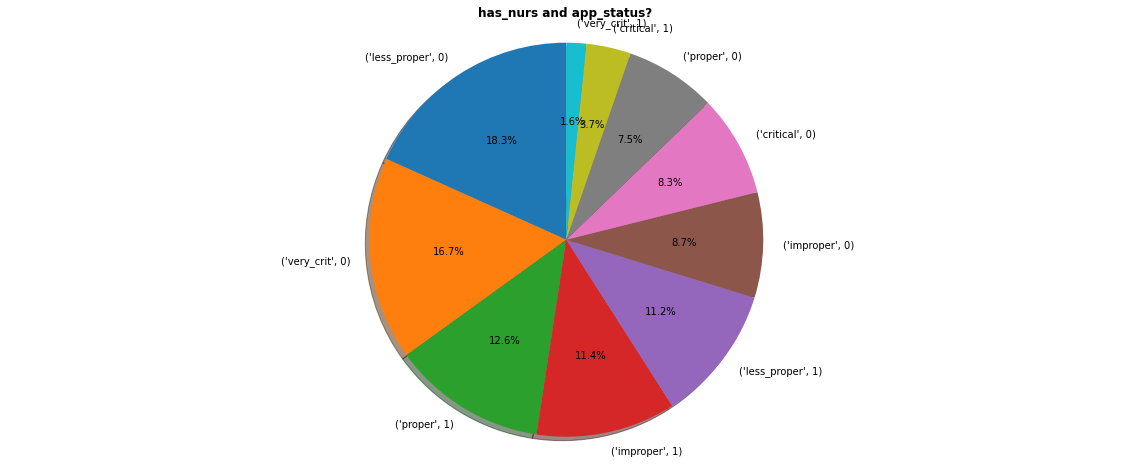

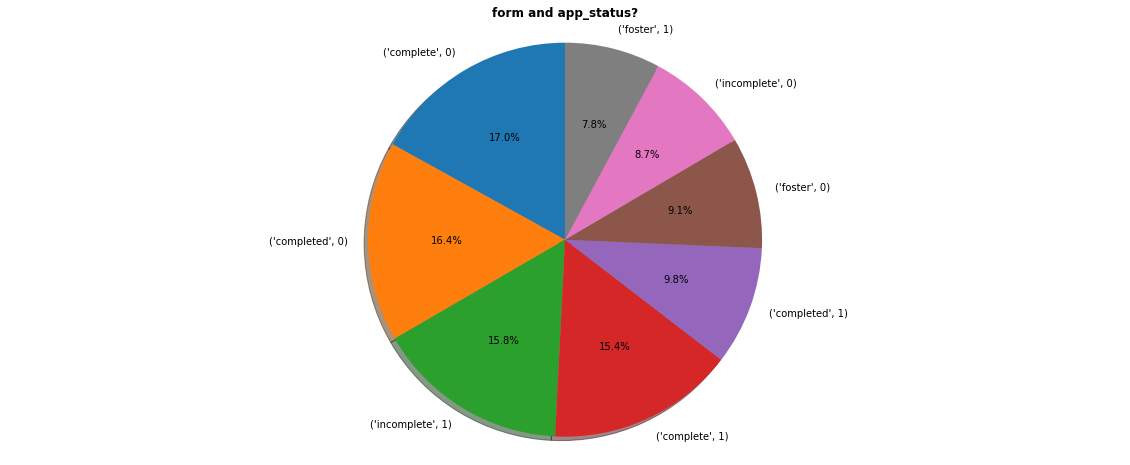

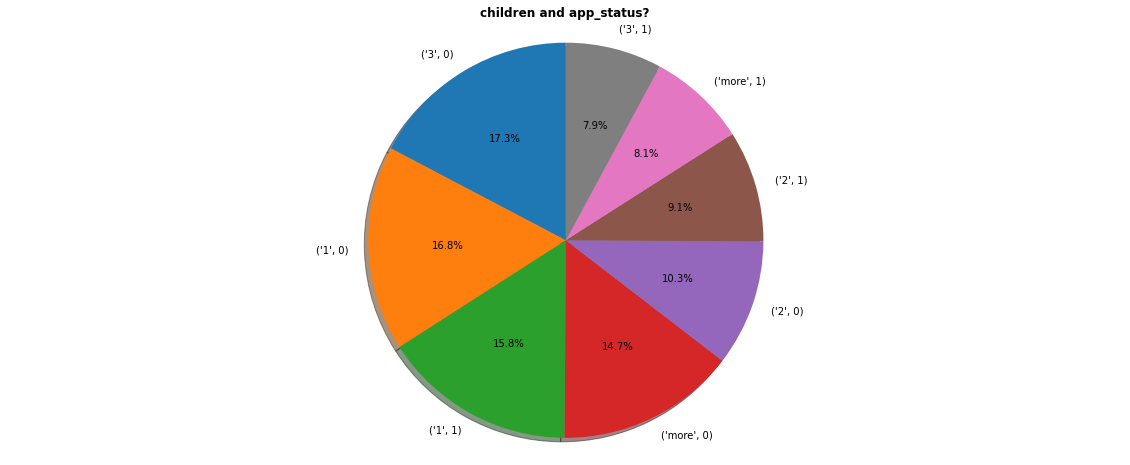

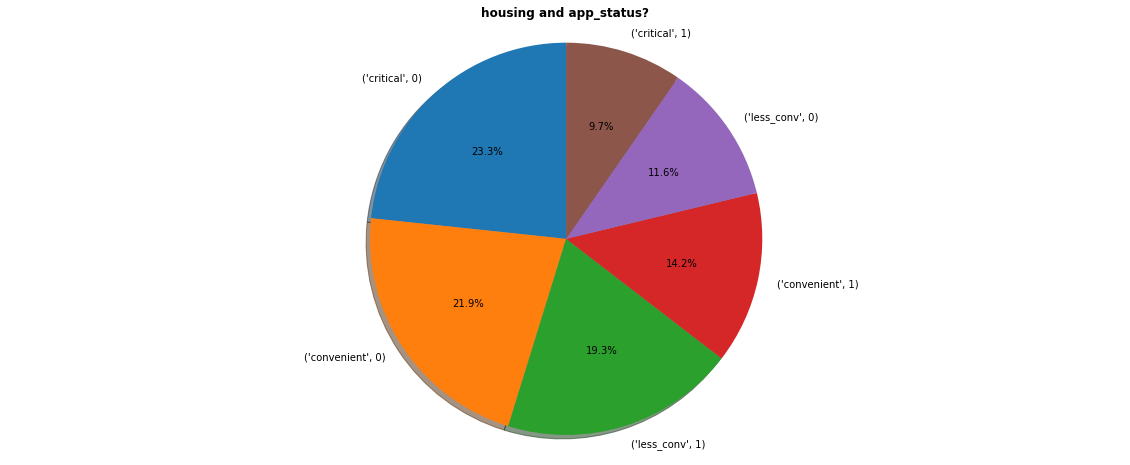

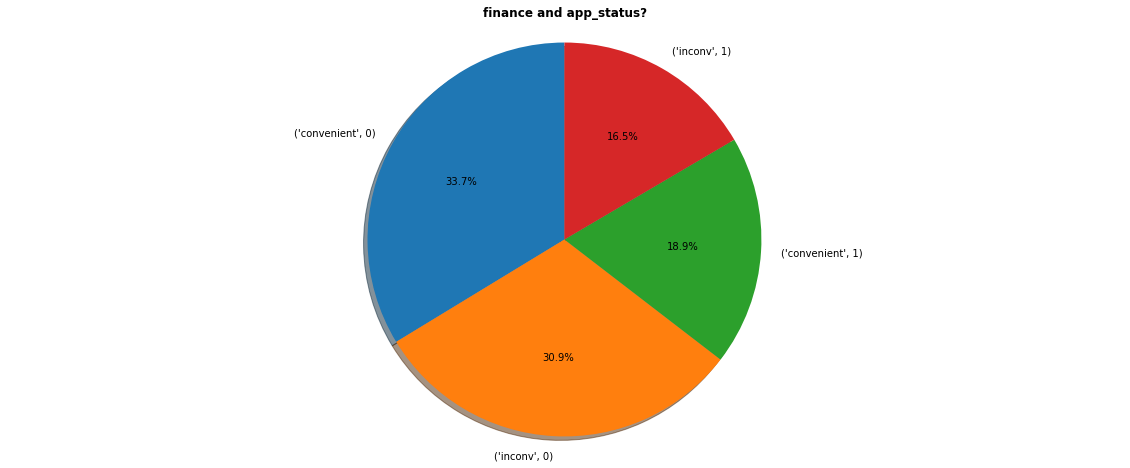

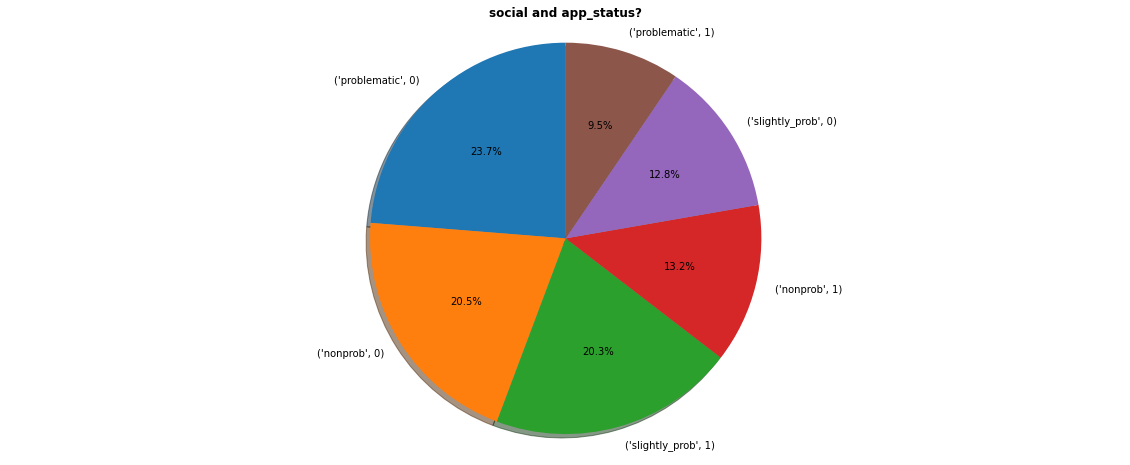

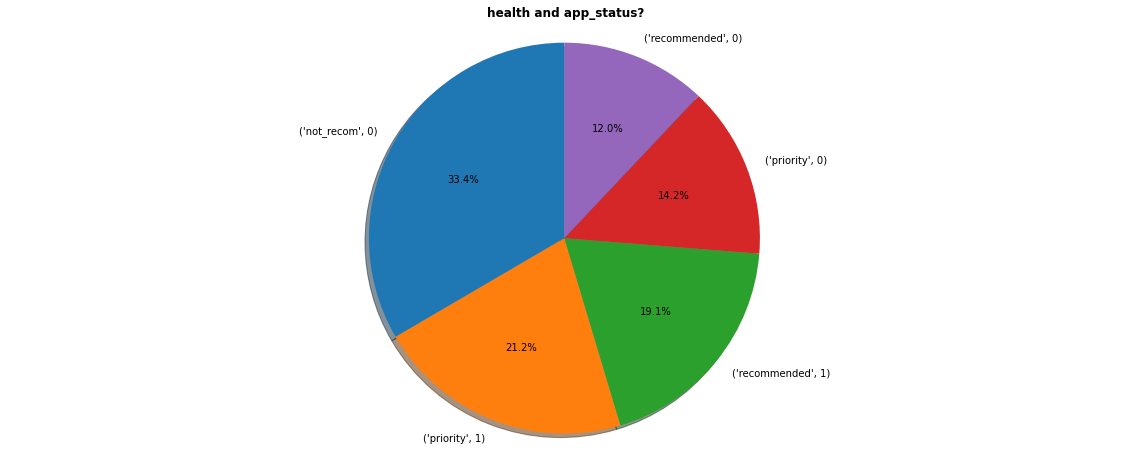

In [23]:
for column in columns.drop('app_status'):
    zipped = list(zip(dataset[column],dataset['app_status']))
    zipped = pd.DataFrame([zipped])
    zipped = zipped.T

    labels = zipped[0].unique()
    values = zipped[0].value_counts()

    fig, ax = plt.subplots(1,figsize=(20,8))
    ax.pie(values, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax.axis('equal')  
    plt.title("{} and app_status?".format(column),fontweight='bold')
    plt.show()